In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopy as gp
from geopy import distance

In [2]:
def do_star_graph_series(series,node_color='pink',font_color='black',mode='node',title=''):
    labs = ['']+list(series.index)
    labs = dict(zip(labs,labs))
    g = nx.DiGraph()
    i = 1
    g.add_star(['']+list(series.index))

    pos = nx.layout.spring_layout(g)

    if mode=='both':
        
        node_sizes = [100]+list(series.values.ravel())
        edge_colors =list(map(math.log,series.values.ravel()))    
        nodes = nx.draw_networkx_nodes(g,pos,node_size=node_sizes,node_color=node_color)
        edges = nx.draw_networkx_edges(g,pos,node_size=node_sizes,arrowstyle='->',arrowsize=10,width = 2,edge_cmap = plt.cm.winter,edge_color=edge_colors)
        pc = mpl.collections.PatchCollection(edges,cmap=plt.cm.winter)
        pc.set_array(edge_colors)
        plt.colorbar(pc)

    # edge_colors=range(2,g.number_of_edges()+2 )
    elif mode=='edge':
        edge_colors =list(map(math.log,series.values.ravel()))
        nodes = nx.draw_networkx_nodes(g,pos,node_color=node_color)
        node_sizes = [100]+list(series.values.ravel())

        edges = nx.draw_networkx_edges(g,pos,node_size=node_sizes,arrowstyle='->',arrowsize=10,width = 2,edge_cmap = plt.cm.winter,edge_color=edge_colors)
        pc = mpl.collections.PatchCollection(edges,cmap=plt.cm.winter)
        pc.set_array(edge_colors)
        plt.colorbar(pc)
    elif mode=='node':
        node_sizes = [100]+list(series.values.ravel())
        nodes = nx.draw_networkx_nodes(g,pos,node_size=node_sizes,node_color=node_color)
        edges = nx.draw_networkx_edges(g,pos,node_size=node_sizes,arrowstyle='->',arrowsize=10,width = 2)

    labels = nx.draw_networkx_labels(g,pos,labels=labs,font_color=font_color)



    ax = plt.gca()
    ax.set_axis_off()
    fig = plt.gcf()
    fig.set_size_inches(14,10)
    plt.title(title)
    plt.show()

In [75]:
data = pd.read_csv('data/openfoodfacts.csv',delimiter='\t',low_memory = False)
distance_df = pd.read_csv('data/DistancePerProduct.csv')

In [90]:
# data['code'] = data['code'].apply(lambda x : x.strip('0'))
# data.set_index('code',inplace=True)
distance_df.set_index('Unnamed: 0',inplace=True)
distance_df.index.name = ''



In [91]:
z = data.join(distance_df).dropna(subset=['distance'])

In [114]:
z.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,distance
106,0000000030564,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055730,2017-03-09T10:35:30Z,1489055730,2017-03-09T10:35:30Z,Organic Small Red Chili Beans,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0 km
251,0000000338448,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1532451362,2018-07-24T16:56:02Z,1532451374,2018-07-24T16:56:14Z,Bon bombz jelly,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0 km
254,0000000394710,http://world-en.openfoodfacts.org/product/0000...,b7,1484497370,2017-01-15T16:22:50Z,1484501040,2017-01-15T17:24:00Z,Danoises à la cannelle roulées,Pâtisserie,1.150 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2370.413699903153 km
264,0000001938067,http://world-en.openfoodfacts.org/product/0000...,b7,1484501528,2017-01-15T17:32:08Z,1484504972,2017-01-15T18:29:32Z,Chaussons tressés aux pommes,Pâtisserie,1.200 kg,...,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2370.413699903153 km
269,0000003000038,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1538247941,2018-09-29T19:05:41Z,1538247943,2018-09-29T19:05:43Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,971.5166387817493 km


In [116]:
def explode(dataframe,by,index='0'):
    z = data
    z = z[[by]]
    z = z[by].str.split(',').apply(pd.Series).unstack().dropna().to_frame()
    z = z.reset_index().set_index(index)
    z.columns = ['',by]
    y = z[[by]]
    return z

exploded = explode(z,'categories')
exploded.head()

KeyError: '0'

In [135]:
## Explode the categroies...
explode = z['categories'].str.split(',').apply(pd.Series).unstack().dropna().to_frame()
explode = explode.reset_index().set_index('level_1')
explode = explode.drop(['level_0'],axis=1)
explode.index.name=''
explode.head()

,0
,
254,Snacks sucrés
264,Snacks sucrés
289,Poulets cuisinés
289,Poulets cuisinés
296,en:beverages


In [138]:
merged = explode.join(z)
merged

,0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,...,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,distance
254,Snacks sucrés,0000000394710,http://world-en.openfoodfacts.org/product/0000...,b7,1484497370,2017-01-15T16:22:50Z,1484501040,2017-01-15T17:24:00Z,Danoises à la cannelle roulées,Pâtisserie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2370.413699903153 km
254,Biscuits et gâteaux,0000000394710,http://world-en.openfoodfacts.org/product/0000...,b7,1484497370,2017-01-15T16:22:50Z,1484501040,2017-01-15T17:24:00Z,Danoises à la cannelle roulées,Pâtisserie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2370.413699903153 km
254,Pâtisseries,0000000394710,http://world-en.openfoodfacts.org/product/0000...,b7,1484497370,2017-01-15T16:22:50Z,1484501040,2017-01-15T17:24:00Z,Danoises à la cannelle roulées,Pâtisserie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2370.413699903153 km
264,Snacks sucrés,0000001938067,http://world-en.openfoodfacts.org/product/0000...,b7,1484501528,2017-01-15T17:32:08Z,1484504972,2017-01-15T18:29:32Z,Chaussons tressés aux pommes,Pâtisserie,...,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2370.413699903153 km
264,Biscuits et gâteaux,0000001938067,http://world-en.openfoodfacts.org/product/0000...,b7,1484501528,2017-01-15T17:32:08Z,1484504972,2017-01-15T18:29:32Z,Chaussons tressés aux pommes,Pâtisserie,...,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2370.413699903153 km
264,Pâtisseries,0000001938067,http://world-en.openfoodfacts.org/product/0000...,b7,1484501528,2017-01-15T17:32:08Z,1484504972,2017-01-15T18:29:32Z,Chaussons tressés aux pommes,Pâtisserie,...,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2370.413699903153 km
289,Poulets cuisinés,0000008240095,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1484342673,2017-01-13T21:24:33Z,1484343211,2017-01-13T21:33:31Z,Pâté au poulet,Pâté à la viande,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7734.861776902698 km
289,Poulets cuisinés,0000008240095,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1484342673,2017-01-13T21:24:33Z,1484343211,2017-01-13T21:33:31Z,Pâté au poulet,Pâté à la viande,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0 km
289,Poulets cuisinés,0000008240095,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1484342673,2017-01-13T21:24:33Z,1484343211,2017-01-13T21:33:31Z,Pâté au poulet,Pâté à la viande,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7734.861776902698 km
289,Poulets cuisinés,0000008240095,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1484342673,2017-01-13T21:24:33Z,1484343211,2017-01-13T21:33:31Z,Pâté au poulet,Pâté à la viande,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0 km


In [154]:
largest = explode[explode[0].apply(lambda x : not x.startswith('en:'))][0].value_counts().nlargest(10)

Aliments et boissons à base de végétaux
-------------


C:\Users\johan\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


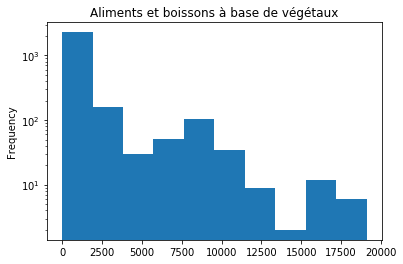

Aliments d'origine végétale
-------------


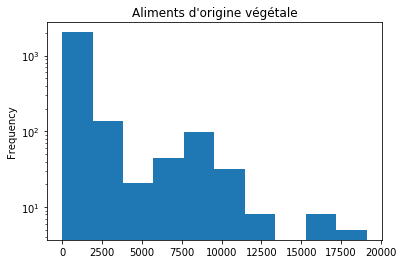

Snacks sucrés
-------------


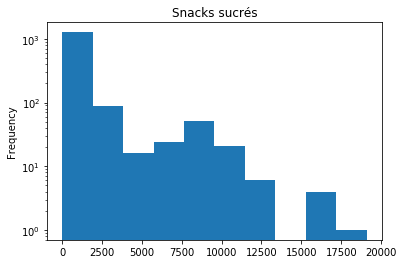

Produits laitiers
-------------


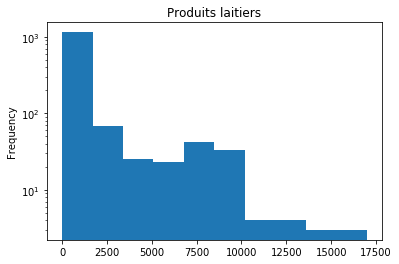

Boissons
-------------


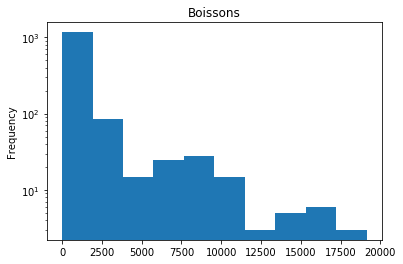

Plats préparés
-------------


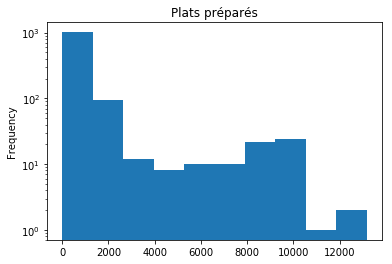

Céréales et pommes de terre
-------------


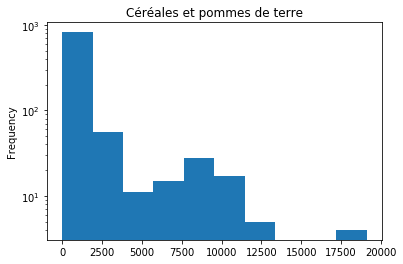

Aliments à base de fruits et de légumes
-------------


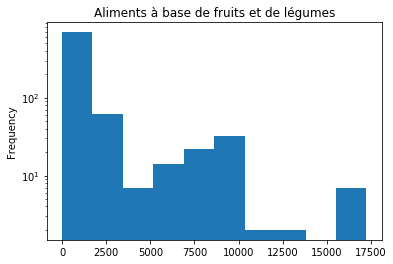

Desserts
-------------


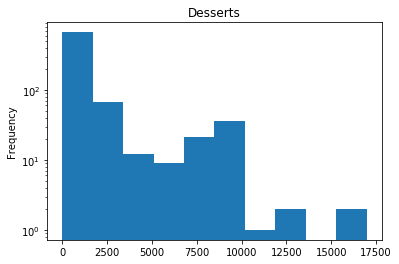

Frais
-------------


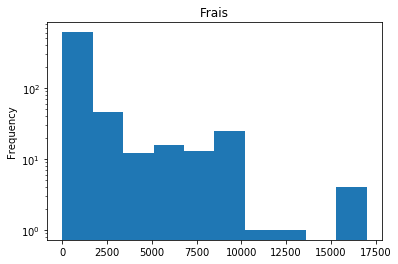

In [162]:
for category in list(largest.index):
    cat = merged[merged[0]==category]
    print(category)
    cat['distance'] = cat['distance'].apply(lambda x : float(x[:-2]))
    cat['distance'].plot.hist(bins=10,title=category,logy=True)
    print("-------------")
    plt.show()

254       2370.413700
254       2370.413700
254       2370.413700
264       2370.413700
264       2370.413700
264       2370.413700
289       7734.861777
289          0.000000
289       7734.861777
289          0.000000
296       2370.413700
297       2370.413700
297       2370.413700
297       2370.413700
297       2370.413700
297       2370.413700
297       2370.413700
297       2370.413700
297       2370.413700
297       2370.413700
297       2370.413700
299       7734.861777
299       7734.861777
305          0.000000
406          0.000000
406          0.000000
406          0.000000
406          0.000000
565          0.000000
576          0.000000
             ...     
664732     193.616770
664868     717.792494
664868     717.792494
664868     717.792494
664935     680.001857
665129       0.000000
665136       0.000000
665136       0.000000
665171     961.610922
665171     961.610922
665190     961.610922
665190     961.610922
665190     961.610922
665190     961.610922
665191    